# <center>Electric Dipole</center>
* Two charges, nominally $q_1 = 1$ and $q_2 = -0.4$, but values and positions are adjustable.
* For clarity, I omit the ubiquitous factor of $\frac{1}{4\pi\epsilon_0}$. 
* Plot the field lines and equipotentials.
* Suggested exercise: Assuming that $q_+ \gt \lvert{q_-}\rvert$, verify that the fraction (fractional solid angle) of  $q_+$'s field lines that end on $q_-$ is $\lvert{q_-}\rvert/q_+$.  You'll have to estimate the angle, $\theta$, that separates the field lines ending on $q_-$ from those that go to infinity, then integrate the solid angle from $0$ to $\theta$ angle.  Don't forget the factor of $\sin(\theta)$ in the solid angle.  Alternatively, you can calculate the angle and graph lines (on the field line plot) that have the calculated slopes ($\pm\tan(\theta)$).

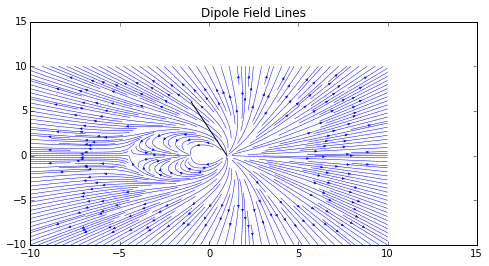

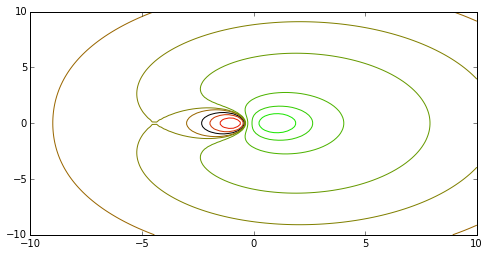

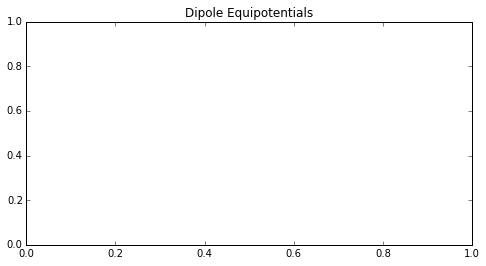

In [17]:
import numpy as np
# Plotting functions.
import matplotlib as mpl
import matplotlib.pyplot as plt
# Display the plots here (inline).
%matplotlib inline                     
mpl.rcParams['figure.figsize']=[8,4]  # Set H and V sizes of plots.

# Magnitude and position of q1.
q1=1.0
x1=1.0
y1=0.0

# Magnitude and position of q2.
q2=-0.4
x2=-1.0
y2=0.0

# Where to evaluate the field and potential.
# Y and X are lists of coordinates that fill the specified grid.
# The imaginary argument, 101j, tells mgrid to create 101 points between
# -Size and +Size inclusive.  If it were real, it would be the step length, 
# starting at -Size.
# This is **REALLY UGLY CODE**, but we have to live with it.
xSize = 10
ySize = 10
Y, X = np.mgrid[-ySize:ySize:100j, -xSize:xSize:100j]

# Calculate the magnitude and components of the field due to q1.
# Because X and Y are each 1-D lists, d1, etc., are 2-D lists.
d1=np.sqrt((X-x1)**2+(Y-y1)**2)
V1=q1/d1
Emag1=q1/((X-x1)**2+(Y-y1)**2)
E1x=((X-x1)/d1)*Emag1
E1y=((Y-y1)/d1)*Emag1

# Calculate the magnitude and components of the field due to q2.
d2=np.sqrt((X-x2)**2+(Y-y2)**2)
V2=q2/d2
Emag2=q2/((X-x2)**2+(Y-y2)**2)
E2x=((X-x2)/d2)*Emag2
E2y=((Y-y2)/d2)*Emag2

# The field and potential due to q1 + q2.
Etot=np.sqrt((E1x+E2x)**2+(E1y+E2y)**2)
Etotx=E1x+E2x
Etoty=E1y+E2y
Vtot=V1+V2

# Plot the field lines.
# "density" controls how close together the lines are allowed to be.
# "arrowsize" controls the size of the arrowheads.
# "color" specifies the color.  "b" = blue.  There are other syntaxes.  
#   See: http://matplotlib.org/api/colors_api.html
plt.streamplot(X, Y, Etotx, Etoty, density=3, arrowsize=0.5, color='b', linewidth=0.5)

# This code will draw a line starting at q1 on the field line plot:
# y = slope*(x-x1).  You can use it to estimate the angle that 
# separates field lines that go to infinity from those that end at q1.
# slope = -2
# x = np.linspace(1, -1)
# plt.plot(x, slope*(x-x1), color='k', linewidth=1)

plt.title("Dipole Field Lines")
plt.show()

# Plot the equipotentials:
# The values of V for which to plot the contours:
# I picked the values to look nice when q1 = 1 and q2 = -0.4. 
Vcontours = [q2, 0.2*q2, 0, 0.05*q1, 0.06753*q1, 0.1*q1, 0.25*q1, 
             0.5*q1, q1]
# The RGB colors for each contour Mostly red to mostly blue.  V = 0 is black:
clist=((0.9,0.1,0),(0.8,0.2,0),(0,0,0),(0.6,0.4,0),(0.5,0.5,0),
       (0.4,0.6,0),(0.3,0.7,0),(0.2,0.8,0),(0.1,0.9,0))
plot.contour(X,Y,Vtot,Vcontours,colors=clist)

plt.show()

plt.title("Dipole Equipotentials")
plt.show()